# Final Project


The objective of the 14th Pacific-Asia Knowledge Discovery and Data Mining conference (PAKDD 2010) was to develop a predictive risk assessment model to rank order credit card applicants on their probability to default on payments.

There were 3 datasets used for the Challenge. They were collected during period from 2006 to 2009, and came from a private label credit card operation of a Brazilian credit company and its partner shops.

The prediction targets to detect are the “bad” clients. A client is labeled as “bad” (target variable=1) if he/she made 60 days delay in any payment of the bills contracted along the first year after the credit has been granted. In short, the clients that do not pay their debt are labeled as “bad”.


### Understand data structure


The datasets that are available:
1. Modelling (50,000 samples): This is the only dataset where we have the “target” information (we know the “bad” clients).
<br>
2. Leaderboard (20,000 samples): This dataset was used on the internet web-site of the competition to give instantaneous feedback about the accuracy of the different models developed by the different teams.
<br>
3. Prediction (20,000 samples): This is the only dataset that was used to obtain the final ranking of the competition.
<br>
4. Variable list: This is a .XLS that contains all the feature and its description.
<br>
5. Leaderboard Submission Example: This file contains an example of submission. Ids and Probabilities.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Reading the files

In [2]:
modeling_ds = pd.read_csv('../data/PAKDD-2010 training data/PAKDD2010_Modeling_Data.txt', encoding ='ISO-8859-1',sep='\t', header = None )
leaderboard_ds= pd.read_csv('../data/LeaderBoard_Data/PAKDD2010_Leaderboard_Data.txt',sep='\t', header = None)
prediction_ds = pd.read_csv('../data/Prediction_data/PAKDD2010_Prediction_Data.txt',sep='\t', header = None)
variable_description = pd.read_excel('../data/PAKDD2010_VariablesList.XLS')

In [3]:
leaderboard_ds.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,50001,C,1,Web,0,1,F,1,0,4,...,NaN,0,0,0,0,1,Y,48,618,618
1,50002,C,20,Web,0,1,F,1,0,4,...,NaN,0,0,0,0,1,N,29,358,358
2,50003,C,25,Web,0,1,M,1,0,2,...,NaN,0,0,0,0,1,N,53,670,670
3,50004,C,10,Web,0,1,F,7,0,3,...,NaN,0,0,0,0,1,N,38,591,591
4,50005,C,25,Web,0,1,F,1,0,4,...,NaN,0,0,0,0,2,N,19,844,844


In [4]:
prediction_ds.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,70001,C,10,Web,NaN,1,F,1,0,5,...,NaN,0,0,0,0,2,N,29,318,318
1,70002,C,10,Web,NaN,1,F,1,0,3,...,2.0,0,0,0,0,2,N,41,173,173
2,70003,C,25,Web,NaN,1,F,2,0,4,...,NaN,0,0,0,0,1,N,38,716,716
3,70004,C,5,Web,NaN,1,F,1,0,3,...,NaN,0,0,0,0,1,N,45,869,869
4,70005,C,20,Web,NaN,1,F,1,0,4,...,NaN,0,0,0,0,1,N,49,289,289


In [5]:
variable_description.head()

,Var_Id,Var_Title,Var_Description,Field_Content
0,1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
1,2,CLERK_TYPE,Not informed,C
2,3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
3,4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
4,5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"


### Conclusion Reading Files

As we can see, just modeling_ds has the target (1 Default, 0 Good payer). So <b>modeling_ds</b> will be de dataset used across EDA, preprocessing and modeling.

## EDA



### Creating dataset with modeling_ds and variable_description as feature names.

In [6]:
labels = variable_description['Var_Title'].tolist()
print(labels)

['ID_CLIENT', 'CLERK_TYPE', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE', 'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'EDUCATION_LEVEL', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'NACIONALITY', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE', 'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_MOBILE_PHONE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE', 'PROFESSIONAL_PHONE_AREA_CODE', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'EDUCATION_LEVEL', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'PRODUCT', 'FLAG_A

<b>First problem appears</b>, labels have two 'EDUCATION_LEVEL' columns. First of them make reference to the person who is asking for the loan. The second one is for "Mate's educational level ..."
    So, It will be replaced for "MATE_EDUCATION_LEVEL" in position 43

In [7]:
labels[43] = "MATE_EDUCATION_LEVEL"
labels[-1] = "TARGET"

In [40]:
modeling_ds.columns = labels
modeling_ds.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


### Looking features, quantity and type:

In [11]:
modeling_ds.shape

(50000, 54)

In [12]:
# Describe Suppressing scientific notation.
modeling_ds.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
ID_CLIENT,50000.00000,25000.50000,14433.90107,1.00000,12500.75000,25000.50000,37500.25000,50000.00000
PAYMENT_DAY,50000.00000,12.86992,6.60839,1.00000,10.00000,10.00000,15.00000,25.00000
QUANT_ADDITIONAL_CARDS,50000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
POSTAL_ADDRESS_TYPE,50000.00000,1.00654,0.08061,1.00000,1.00000,1.00000,1.00000,2.00000
MARITAL_STATUS,50000.00000,2.14840,1.32285,0.00000,1.00000,2.00000,2.00000,7.00000
QUANT_DEPENDANTS,50000.00000,0.65052,1.19365,0.00000,0.00000,0.00000,1.00000,53.00000
EDUCATION_LEVEL,50000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
NACIONALITY,50000.00000,0.96160,0.20210,0.00000,1.00000,1.00000,1.00000,2.00000
RESIDENCE_TYPE,48651.00000,1.25223,0.86783,0.00000,1.00000,1.00000,1.00000,5.00000
MONTHS_IN_RESIDENCE,46223.00000,9.72715,10.66884,0.00000,1.00000,6.00000,15.00000,228.00000


<b>We have some columns with just one value</b> 

In [13]:
def show_values(ds, max_values = 10, show_all = True):
    lst_values = []
    
    for column in modeling_ds.columns:
        try:
            if modeling_ds[column].nunique() <= max_values:
                print(f'Name: {column} | Quantity of values: {modeling_ds[column].nunique()} | Values: {modeling_ds[column].unique()} | Nan: {modeling_ds[column].isna().sum()} | Type: {modeling_ds[column].dtype} \b')     
                lst_values.append(column)
            else:
                if show_all:
                    print(f'Name:{column} | Quantity of values: {modeling_ds[column].nunique()} | Nan: {modeling_ds[column].isna().sum()} | Type: {modeling_ds[column].dtype} \b')     
                else:
                    pass
        except Exception as e:
            print(f'Error {e}, column {column}  ')
    print(f'\n Quantity of columns with {max_values} value: {len(lst_values)}')
    return lst_values

In [14]:
unique_value_features = show_values(modeling_ds,max_values = 1, show_all = True)

Name:ID_CLIENT | Quantity of values: 50000 | Nan: 0 | Type: int64
Name: CLERK_TYPE | Quantity of values: 1 | Values: ['C'] | Nan: 0 | Type: object
Name:PAYMENT_DAY | Quantity of values: 6 | Nan: 0 | Type: int64
Name:APPLICATION_SUBMISSION_TYPE | Quantity of values: 3 | Nan: 0 | Type: object
Name: QUANT_ADDITIONAL_CARDS | Quantity of values: 1 | Values: [0] | Nan: 0 | Type: int64
Name:POSTAL_ADDRESS_TYPE | Quantity of values: 2 | Nan: 0 | Type: int64
Name:SEX | Quantity of values: 4 | Nan: 0 | Type: object
Name:MARITAL_STATUS | Quantity of values: 8 | Nan: 0 | Type: int64
Name:QUANT_DEPENDANTS | Quantity of values: 17 | Nan: 0 | Type: int64
Name: EDUCATION_LEVEL | Quantity of values: 1 | Values: [0] | Nan: 0 | Type: int64
Name:STATE_OF_BIRTH | Quantity of values: 29 | Nan: 0 | Type: object
Name:CITY_OF_BIRTH | Quantity of values: 9910 | Nan: 0 | Type: object
Name:NACIONALITY | Quantity of values: 3 | Nan: 0 | Type: int64
Name:RESIDENCIAL_STATE | Quantity of values: 27 | Nan: 0 | Type: o

In [15]:
unique_value_features

['CLERK_TYPE',
 'QUANT_ADDITIONAL_CARDS',
 'EDUCATION_LEVEL',
 'FLAG_MOBILE_PHONE',
 'FLAG_HOME_ADDRESS_DOCUMENT',
 'FLAG_RG',
 'FLAG_CPF',
 'FLAG_INCOME_PROOF',
 'FLAG_ACSP_RECORD']

In [16]:
modeling_ds[unique_value_features].head()

,CLERK_TYPE,QUANT_ADDITIONAL_CARDS,EDUCATION_LEVEL,FLAG_MOBILE_PHONE,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,FLAG_ACSP_RECORD
0,C,0,0,N,0,0,0,0,N
1,C,0,0,N,0,0,0,0,N
2,C,0,0,N,0,0,0,0,N
3,C,0,0,N,0,0,0,0,N
4,C,0,0,N,0,0,0,0,N


<b>Interesting finding, 9 columns have only 1 value and We can not infer it. So the decision is remove them from the dataset.</b>

# Nan Values

In [17]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [18]:
missing_values_table(modeling_ds)

Your selected dataframe has 54 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
PROFESSIONAL_CITY,33783,67.6
PROFESSIONAL_BOROUGH,33783,67.6
MATE_EDUCATION_LEVEL,32338,64.7
MATE_PROFESSION_CODE,28884,57.8
PROFESSION_CODE,7756,15.5
OCCUPATION_TYPE,7313,14.6
MONTHS_IN_RESIDENCE,3777,7.6
RESIDENCE_TYPE,1349,2.7


First four features have more than 50% of nans values. They will be taken into account for further analysis.

### Deep look into some variables :

<i><b>TARGET:</b> <br> A client is labeled as “bad” (target variable=1) if he/she made 60 days delay in any payment of the bills</i><br>

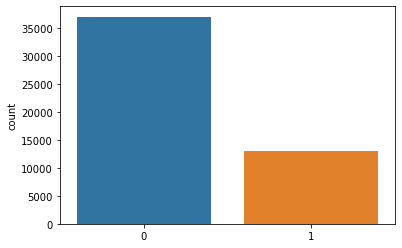

In [19]:
sns.countplot(data=modeling_ds,x=modeling_ds['TARGET'].values)

There are 73,91% of the client that did not delay in any payment and there 26,08% that made 60 days delay in any payment of the bills contracted along the first year after the credit has been granted. 
The dataset is <b>not balanced</b> , this is noticed here and make us to recalibrate our model metrics to not get into the “Accuracy Paradox”.  

<i><b>PAYMENT_DAY:</b><br> Day of the month for bill payment, chosen by the applicant</i><br>
As we see there are not nan values and We have 6 posibilities. Interesting finding, person who has they payment after the 15 day, are more propense to deafult. 

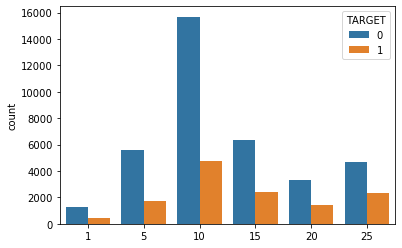

In [20]:
sns.countplot(data=modeling_ds,x=modeling_ds['PAYMENT_DAY'].values, hue = modeling_ds['TARGET'] )

<i><b>APPLICATION_SUBMISSION_TYPE:</b><br> Indicates if the application was submitted via the internet or in person/posted</i><br> 
As we see there are not nan values and We have 3 posibilities. But What is "0" value?

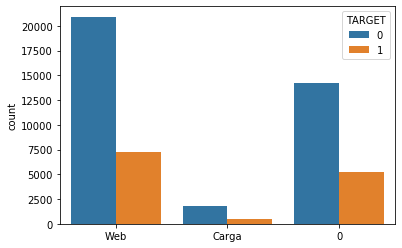

In [21]:
sns.countplot(data=modeling_ds,x=modeling_ds['APPLICATION_SUBMISSION_TYPE'].values, hue = modeling_ds['TARGET'] )

<i><b>SEX:</b></i><br> 
As we see there are not nan values and We have 4 posibilities. F, M, N and ' '. So N is like did not want to give this information but ' ' is like nothing was charge in the document.

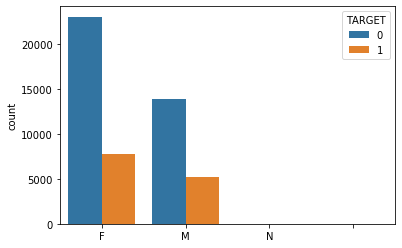

In [22]:
sns.countplot(data=modeling_ds,x=modeling_ds['SEX'].values, hue = modeling_ds['TARGET'])

<i><b>QUANT_BANKING_ACCOUNTS and QUANT_SPECIAL_BANKING_ACCOUNTS</b></i><br> 
This features are the same.

In [23]:
modeling_ds['QUANT_BANKING_ACCOUNTS'].equals(modeling_ds['QUANT_SPECIAL_BANKING_ACCOUNTS'])

True

<i><b>QUANT_DEPENDANTS:</b></i><br> 
As we see there are not nan values and we have some outliers like a person who has +50 dependants. We have to deal with this outliers in pre-proccessing.

In [24]:
modeling_ds["QUANT_DEPENDANTS"].nlargest(5)

40462    53
19449    15
9018     14
15065    14
27904    14
Name: QUANT_DEPENDANTS, dtype: int64

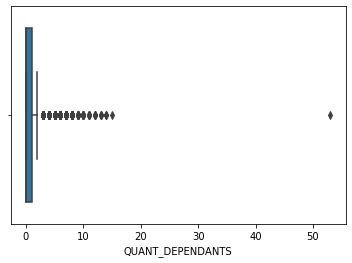

In [25]:
sns.boxplot( x=modeling_ds["QUANT_DEPENDANTS"])

<i><b>STATE_OF_BIRTH:</b></i><br> 
As we see there are not nan values and there are 29 posibilities but Brasil has 27 states. We have to deal with the blank space  and XX value.

In [26]:
modeling_ds['STATE_OF_BIRTH'].value_counts()

BA    5717
SP    5695
RS    5017
CE    4786
PE    4098
MG    3776
      2064
RN    2008
PR    1971
RJ    1826
PA    1692
AL    1645
PB    1609
MA    1416
GO    1143
MT     849
SC     707
PI     675
ES     638
MS     496
AC     474
SE     356
AM     354
DF     310
TO     244
AP     236
RO     155
RR      42
XX       1
Name: STATE_OF_BIRTH, dtype: int64

<i><b>Cities and ubication Features:</b></i><br> 
STATE_OF_BIRTH, CITY_OF_BIRTH, <br>
RESIDENCIAL_STATE, RESIDENCIAL_CITY, RESIDENCIAL_BOROUGH, RESIDENCIAL_PHONE_AREA_CODE, <br>
PROFESSIONAL_STATE, PROFESSIONAL_CITY, PROFESSIONAL_BOROUGH, PROFESSIONAL_PHONE_AREA_CODE, <br>
RESIDENCIAL_ZIP_3, PROFESSIONAL_ZIP_3.

Here I have an decision to take. Using the zip code of residencial and profesional we can replace all the state, city and phone area code. 

<a href = https://en.wikipedia.org/wiki/List_of_dialling_codes_in_Brazil> Phone Area Code </a>

<b>Example of Zip</b> <br>
In our brief example we analyze the postal code of the football stadium of Guarani F.C.

Brinco De Ouro Da Princessa
Av. Imperatriz Dona Tereza Cristina, 87
Jardim Guarani, Campinas
SP, 13100-200, Brasile

1 – the first character indicates the region, in our case São Paulo <br>
3 – the second character indicates the sub-region, Campinas <br>
1 – the third character indicates the sector, Campinas and surroundings <br>

Taking this into account let see an example of cities taking in count one ZIP

In [27]:
modeling_ds[modeling_ds['RESIDENCIAL_ZIP_3']==960][['RESIDENCIAL_STATE','RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCIAL_ZIP_3']]

,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCIAL_ZIP_3
57,RS,Pelotas,Fragata,,960
70,RS,pelotas,lot vasco pires,58,960
75,RS,PELOTAS,FRAGATA,58,960
134,RS,Pelotas,areal,58,960
246,RS,PELOTAS,FRAGATA,58,960
...,...,...,...,...,...
49778,RS,Pelotas,areal,58,960
49781,RS,PELOTAS,AREAL,58,960
49803,RS,PELOTAS,NAVEGANTES II,58,960
49850,RS,Pelotas,Fragata,58,960


<i><b>MONTHS_IN_RESIDENCE:</b></i><br> 
We have Nan values but there are not outliers.

In [28]:
modeling_ds["MONTHS_IN_RESIDENCE"].isna().sum()

3777

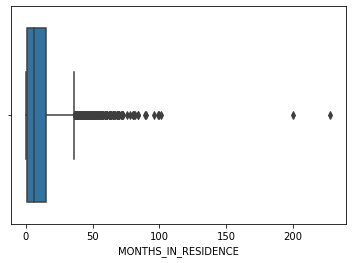

In [29]:
sns.boxplot( x=modeling_ds["MONTHS_IN_RESIDENCE"])

<i><b>PERSONAL_MONTHLY_INCOME:</b><br> Applicant's personal regular monthly income in Brazilian currency (R$)</i><br> 
We does not have nan values and We have some outlier. Also some values are strings

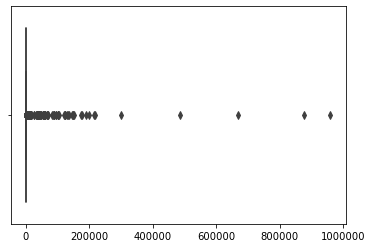

In [30]:
sns.boxplot(x=modeling_ds["PERSONAL_MONTHLY_INCOME"].values)


<i><b>PERSONAL_ASSETS_VALUE:</b><br> Total value of the personal possessions such as houses, cars etc. in Brazilian currency (R$).</i><br> 
We does not have nan values and We have some outlier. Also some values are strings and all values are zero before quantile 0.95

In [31]:
print(modeling_ds['PERSONAL_ASSETS_VALUE'].quantile(0.95))
print(modeling_ds['PERSONAL_ASSETS_VALUE'].quantile(0.96))

0.0
15000.0


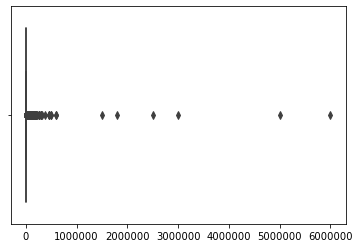

In [32]:
sns.boxplot(x=modeling_ds["PERSONAL_ASSETS_VALUE"].values)

<i><b>MONTHS_IN_THE_JOB:</b><br> Time in the current job in months.</i><br> 
There are not Nans or extreme values.

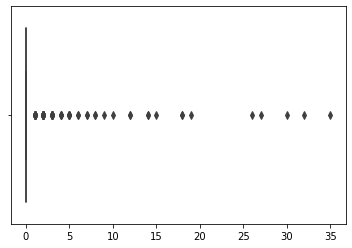

In [33]:
sns.boxplot(x=modeling_ds["MONTHS_IN_THE_JOB"].values)

In [34]:
modeling_ds['PROFESSION_CODE'].isna().sum()

7756

<i><b>MATE_PROFESSION_CODE and MATE_EDUCATION_LEVEL:</b></i><br> 
We have several Nans 57% and 64%. So in this case I will name another caterogry for example 7 or -1. To fill the Nans. I think the ausent of this value are a new catergory for example "Not Profesional" or "Not Provided"

<i><b>AGE:</b> <br>Applicant's age at the moment of submission</i><br> 
We does not have Nans values. But We have some peculiear outliers. For example in Brasil the coming of age is at 18 years. So values under this age are wrong. And the <a href=https://bxblue.com.br/aprenda/limite-de-idade-emprestimo-consignado-inss/> limit</a> is around 80 years


In [35]:
modeling_ds[(modeling_ds['AGE']<18) | (modeling_ds['AGE']>80)]['AGE'].value_counts()

81     73
82     67
83     53
84     51
85     42
86     28
87     25
17     18
89     18
88     18
90     16
91     12
92      7
95      5
96      4
93      4
94      4
100     3
106     2
97      2
99      2
98      2
101     1
6       1
7       1
14      1
Name: AGE, dtype: int64

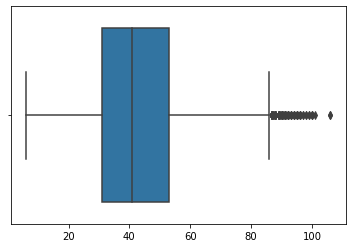

In [36]:
sns.boxplot(x=modeling_ds["AGE"].values)

<i><b>Zip Code:</b></i><br> 
RESIDENCIAL_ZIP_3 is the same as PROFESIONAL_ZIP_3.
Some nan values.
Register = 48923 wich city has the zip 687

In [37]:
modeling_ds.iloc[48923]['RESIDENCIAL_ZIP_3']


'#DIV/0!'

In [38]:
a =  modeling_ds['RESIDENCIAL_ZIP_3'] == modeling_ds['PROFESSIONAL_ZIP_3']
a.unique()

array([ True])